# LN 2 - Veränderung der Armutsrate weltweit


**Gruppe:**
- Elena Stevanovic, Karina von Felbert, Jeremiah Otter

**Titel:** 
- Veränderung der Armutsrate weltweit

**Fragestellung:**

- Auf welchem Kontinent oder Land hat sich die Armutsrate am meisten verändert? Was sind Gründe dafür?  

**Datenquellen:**

-  https://ourworldindata.org/grapher/share-of-population-in-extreme-poverty




### 2. Daten beschaffen und laden

In [27]:
# lade deine Bibliotheken -> Pandas, Seaborn, Matplotlib sind die wichtigsten für diese Aufgaben

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [28]:
pd.read_csv(file_path)

,Entity,Code,Year,$2.15 a day - Share of population in poverty,990305-annotations
0,Albania,ALB,1996,0.534846,NaN
1,Albania,ALB,2002,1.092647,NaN
2,Albania,ALB,2005,0.591086,NaN
3,Albania,ALB,2008,0.199925,NaN
4,Albania,ALB,2012,0.620691,NaN
5,Albania,ALB,2014,1.023101,NaN
6,Albania,ALB,2015,0.096067,NaN
7,Albania,ALB,2016,0.139303,NaN
8,Albania,ALB,2017,0.392570,NaN
9,Albania,ALB,2018,0.048107,NaN


In [19]:
# lade hier deine Daten
file_path = "share-of-population-in-extreme-poverty.csv"

df = pd.read_csv(file_path, skiprows=1,
                 names=['Gebiet','Code','Jahr','Anteil Population in Armut','Annotierung'])
df.head()  



,Gebiet,Code,Jahr,Anteil Population in Armut,Annotierung
0,Albania,ALB,1996,0.534846,NaN
1,Albania,ALB,2002,1.092647,NaN
2,Albania,ALB,2005,0.591086,NaN
3,Albania,ALB,2008,0.199925,NaN
4,Albania,ALB,2012,0.620691,NaN


## 2. Daten vorbereiten 
- Welches Format hat mein Datensatz bzw. wie sind meine Kolumnen strukturiert
Unser Datensatz hat das Longformat
- Welches Format kann ich für welche Teilschritte verwenden (wann soll ich pivot bzw. wide format verwenden)?
- Welche Datentypen kommen in meinem Datensatz vor?

In [16]:
df_pivot = df.pivot(index='Gebiet', columns='Jahr', values='Anteil Population in Armut')
df_pivot.head()

Jahr,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Gebiet,,,,,,,,,,,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.096067,0.139303,0.392570,0.048107,0.000000,0.021277,NaN,NaN,NaN,NaN
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,31.122005,NaN,NaN,NaN,NaN,NaN,NaN
Argentina (urban),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.696885,0.603796,1.044324,1.109743,1.173125,0.894218,0.611890,NaN,NaN
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.146360,1.107947,0.785655,1.339821,1.030070,0.352011,0.523521,0.781078,NaN,NaN


## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?
- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
    - Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
    - Wo fehlen Datenpunkte?
- Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)

*Notiz: Zu jeder Kolumne sollte generell eine Aussage möglich sein.*

In [21]:
df.dtypes

Gebiet                         object
Code                           object
Jahr                            int64
Anteil Population in Armut    float64
Annotierung                    object
dtype: object

**3.1 Analyse der Gebiete**

In [22]:
print('Anzahl verschiedener Gebiete: ', len(df['Gebiet'].unique()))

Anzahl verschiedener Gebiete:  195


In [30]:
df['Gebiet'].unique()

array(['Albania', 'Algeria', 'Angola', 'Argentina (urban)', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bolivia (urban)', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
       'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China',
       'China (rural)', 'China (urban)', 'Colombia', 'Colombia (urban)',
       'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominican Republic', 'East Asia and Pacific (PIP)',
       'East Timor', 'Eastern and Southern Africa (PIP)', 'Ecuador',
       'Ecuador (urban)', 'Egypt', 'El Salvador', 'Estonia', 'Eswatini',
       'Ethiopia', 'Ethiopia (rural)', 'Europe and Central Asia (PIP)',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', '

<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Gebiet', ylabel='Anzahl Datenpunkte'>

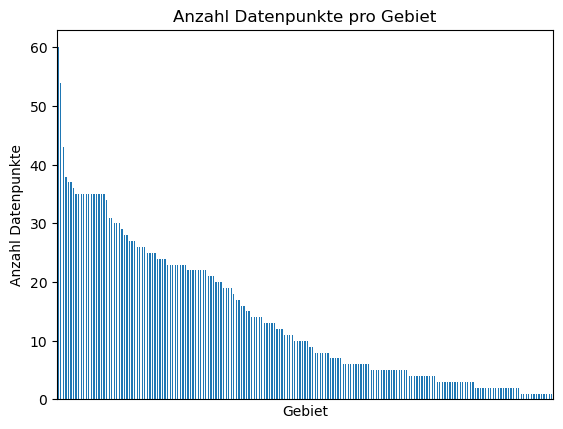

In [25]:
df['Gebiet'].value_counts().plot(kind='bar', 
                                 xticks=[],
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Gebiet')